In [440]:
# standard libraries
import pandas as pd
import numpy as np
# Visualizaton libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [441]:
import openpyxl
dataset = pd.read_excel("Dataset.xlsx")
msk = np.random.rand(len(dataset)) < 0.7
data = dataset[msk]
test_data = dataset[~msk]
data.head()



,Temperature,Pressure,Feed Flow rate,Coolant Flow rate,Inlet reactant concentration,Test
0,406.86,17.66,121.83,2109.20,0.1033,Pass
1,693.39,24.66,133.18,3138.96,0.3785,Pass
2,523.10,23.23,146.55,1058.24,0.4799,Fail
3,612.86,40.97,94.44,1325.12,0.3147,Fail
4,500.28,37.44,185.48,2474.51,0.2284,Pass


<class 'pandas.core.frame.DataFrame'>
Int64Index: 685 entries, 0 to 996
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Temperature                   685 non-null    float64
 1   Pressure                      685 non-null    float64
 2   Feed Flow rate                685 non-null    float64
 3   Coolant Flow rate             685 non-null    float64
 4   Inlet reactant concentration  685 non-null    float64
 5   Test                          685 non-null    object 
dtypes: float64(5), object(1)
memory usage: 37.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 315 entries, 9 to 999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Temperature                   315 non-null    float64
 1   Pressure                      315 non-null    float64
 2   Feed Flow rate            

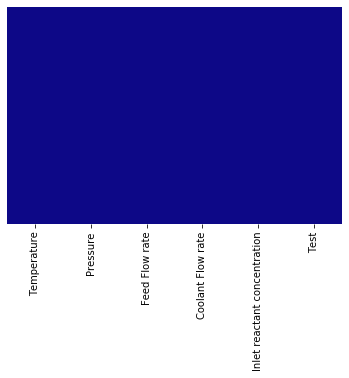

In [442]:
data.info()
test_data.info()
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='plasma')

In [443]:
# no null elements in the data
data.describe()

,Temperature,Pressure,Feed Flow rate,Coolant Flow rate,Inlet reactant concentration
count,685.000000,685.000000,685.000000,685.000000,685.000000
mean,545.223591,25.628876,124.266161,2285.651518,0.304584
std,87.028383,14.228608,43.464065,755.164123,0.117115
min,400.310000,1.140000,50.030000,1002.530000,0.100300
25%,468.170000,13.170000,87.390000,1656.200000,0.202300
50%,544.330000,25.200000,123.020000,2254.120000,0.313000
75%,618.820000,37.880000,161.330000,2974.910000,0.406100
max,699.870000,49.790000,199.320000,3595.620000,0.499600


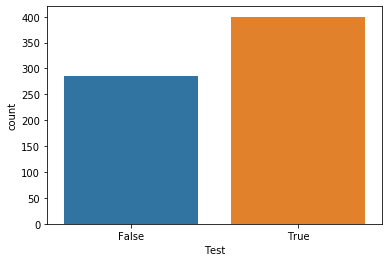

In [444]:
x = data['Test'] == "Pass"
sns.countplot(x)

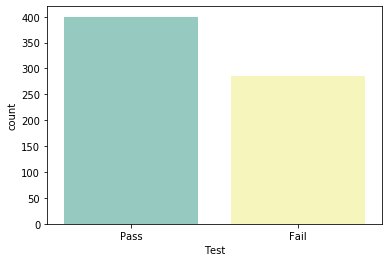

In [445]:
sns.countplot(x = 'Test', data = data, palette='Set3')

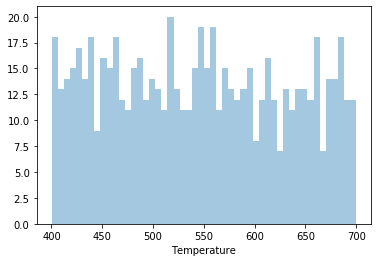

In [446]:
sns.distplot(data['Temperature'].dropna(), kde= False, bins = 50)

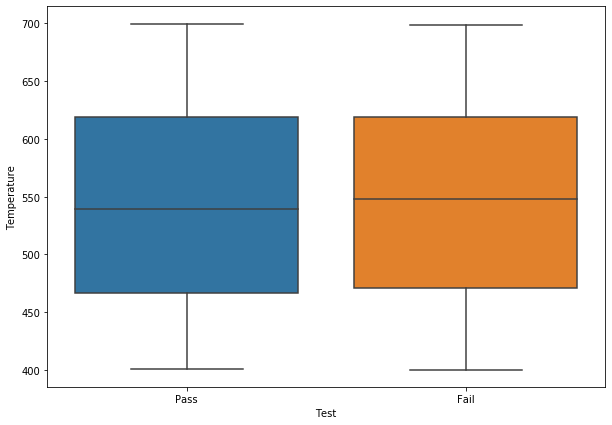

In [447]:
plt.figure(figsize = (10,7))
sns.boxplot(x = 'Test', y = 'Temperature', data = data)

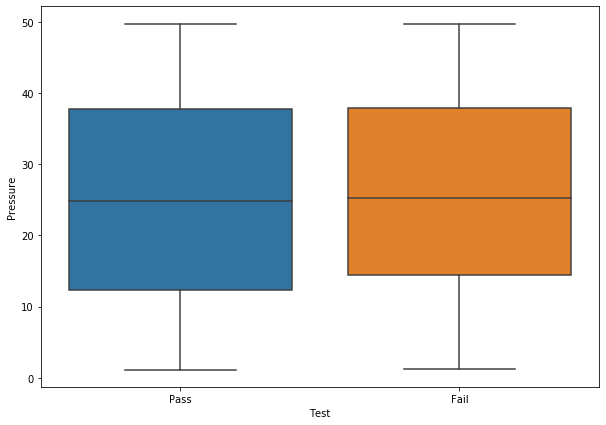

In [448]:
plt.figure(figsize = (10,7))
sns.boxplot(x = 'Test', y = 'Pressure', data = data)

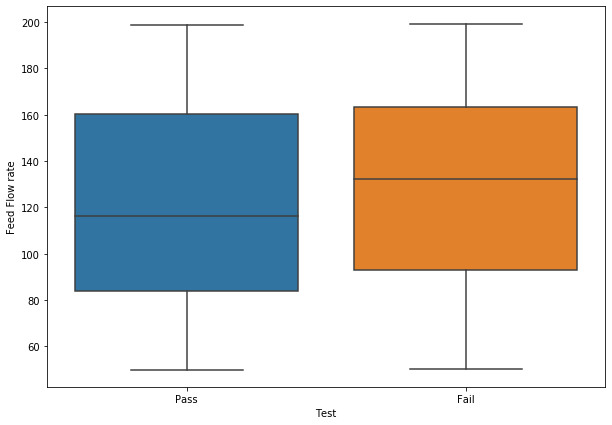

In [449]:
plt.figure(figsize = (10,7))
sns.boxplot(x = 'Test', y = 'Feed Flow rate', data = data)

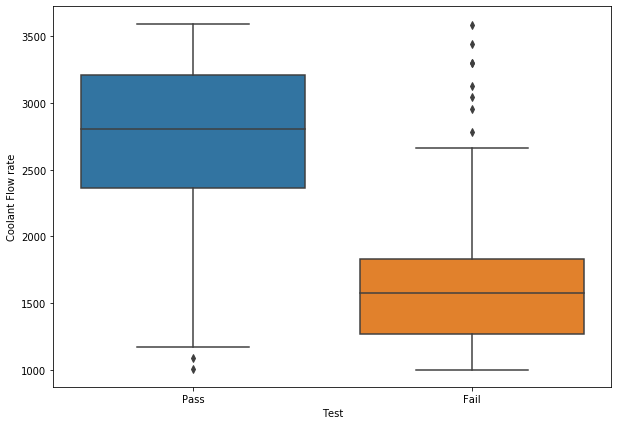

In [450]:
plt.figure(figsize = (10,7))
sns.boxplot(x = 'Test', y = 'Coolant Flow rate', data = data) 

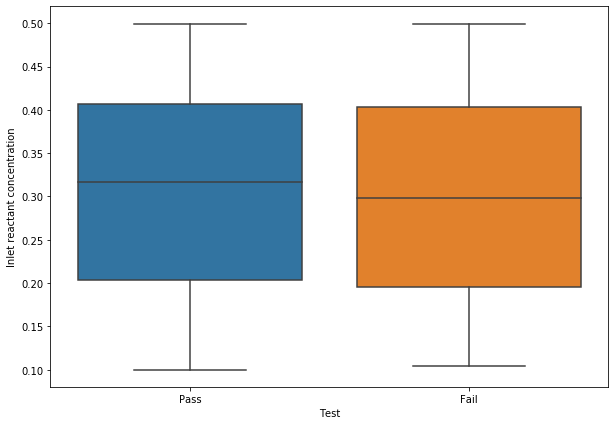

In [451]:
plt.figure(figsize = (10,7))
sns.boxplot(x = 'Test', y = 'Inlet reactant concentration', data = data) 

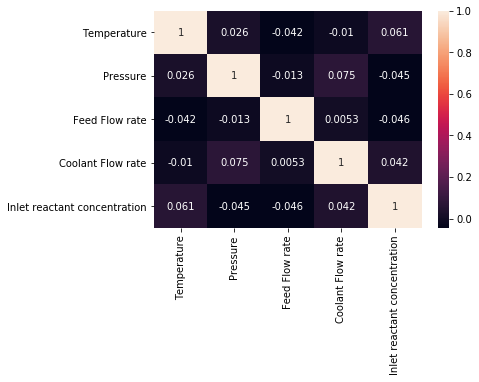

In [452]:
sns.heatmap(data.corr(), annot= True)

In [453]:
pd.get_dummies(data['Test']).head()

,Fail,Pass
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1


In [454]:
Test = pd.get_dummies(data['Test'], drop_first= True)

In [455]:
data = pd.concat([data, Test], axis = 1)

In [456]:
data.head()

,Temperature,Pressure,Feed Flow rate,Coolant Flow rate,Inlet reactant concentration,Test,Pass
0,406.86,17.66,121.83,2109.20,0.1033,Pass,1
1,693.39,24.66,133.18,3138.96,0.3785,Pass,1
2,523.10,23.23,146.55,1058.24,0.4799,Fail,0
3,612.86,40.97,94.44,1325.12,0.3147,Fail,0
4,500.28,37.44,185.48,2474.51,0.2284,Pass,1


In [457]:
data.drop('Test', axis=1,inplace=True)

In [458]:
data.head()

,Temperature,Pressure,Feed Flow rate,Coolant Flow rate,Inlet reactant concentration,Pass
0,406.86,17.66,121.83,2109.20,0.1033,1
1,693.39,24.66,133.18,3138.96,0.3785,1
2,523.10,23.23,146.55,1058.24,0.4799,0
3,612.86,40.97,94.44,1325.12,0.3147,0
4,500.28,37.44,185.48,2474.51,0.2284,1


In [459]:
X = data.drop('Pass', axis = 1)
Y = data['Pass']

In [460]:
from sklearn.linear_model import LogisticRegression
# Supervised learning

In [461]:
model = LogisticRegression(solver='lbfgs', max_iter= 1000)
model.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [462]:
# preparing test data
test = pd.get_dummies(test_data['Test'], drop_first= True)
test_data = pd.concat([test_data, test], axis = 1)
test_data.head()


,Temperature,Pressure,Feed Flow rate,Coolant Flow rate,Inlet reactant concentration,Test,Pass
9,522.52,49.77,170.69,2232.49,0.2544,Fail,0
10,432.78,16.58,61.09,2223.36,0.2123,Pass,1
11,591.40,34.51,109.68,2532.66,0.1111,Fail,0
12,698.43,1.49,177.30,1220.73,0.4725,Fail,0
16,609.60,3.03,93.35,2487.75,0.2674,Pass,1


In [463]:
actual = test_data['Pass']
print(actual)
test_data.drop(['Test', 'Pass'], axis=1,inplace=True)
test_data.head()


9      0
10     1
11     0
12     0
16     1
      ..
987    1
992    0
997    1
998    1
999    0
Name: Pass, Length: 315, dtype: uint8


,Temperature,Pressure,Feed Flow rate,Coolant Flow rate,Inlet reactant concentration
9,522.52,49.77,170.69,2232.49,0.2544
10,432.78,16.58,61.09,2223.36,0.2123
11,591.40,34.51,109.68,2532.66,0.1111
12,698.43,1.49,177.30,1220.73,0.4725
16,609.60,3.03,93.35,2487.75,0.2674


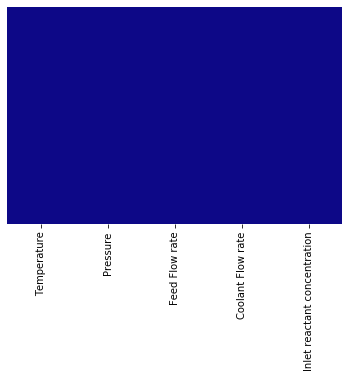

In [464]:
sns.heatmap(test_data.isnull(),yticklabels=False,cbar=False,cmap='plasma')

In [465]:
predictions = model.predict(test_data)

In [466]:
test_data.head()

,Temperature,Pressure,Feed Flow rate,Coolant Flow rate,Inlet reactant concentration
9,522.52,49.77,170.69,2232.49,0.2544
10,432.78,16.58,61.09,2223.36,0.2123
11,591.40,34.51,109.68,2532.66,0.1111
12,698.43,1.49,177.30,1220.73,0.4725
16,609.60,3.03,93.35,2487.75,0.2674


In [467]:
# d = {'Test_result': predictions}
# df = pd.DataFrame(d)
# result = pd.concat([test_data, df], axis = 1)
test_data['Test'] = predictions
test_data.head()
output = test_data
output.to_csv('submission.csv', index= False)
# check.to_csv('check.csv', index = True)

In [468]:
# accuracy check
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

In [469]:
results = confusion_matrix(actual, predictions)
print(results)

[[123   7]
 [  9 176]]


In [470]:
accuracy = accuracy_score(actual, predictions)
print(accuracy)

0.9492063492063492


In [471]:
print(classification_report(actual, predictions))


              precision    recall  f1-score   support

           0       0.93      0.95      0.94       130
           1       0.96      0.95      0.96       185

    accuracy                           0.95       315
   macro avg       0.95      0.95      0.95       315
weighted avg       0.95      0.95      0.95       315

